# PREDICTING HOMELESSNESS IN AMERICA


In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

## Exploratory Data Analysis

In [6]:
df = pd.read_csv('clean_data_set.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 34 columns):
Unnamed: 0                    3157 non-null int64
state                         3157 non-null object
number                        3157 non-null object
year                          3157 non-null int64
population                    3157 non-null float64
renter-occupied-households    3157 non-null float64
eviction-filings              3157 non-null float64
evictions                     3157 non-null float64
total_ssi                     3157 non-null int64
aged_ssi                      3157 non-null int64
disbl_ssi                     3157 non-null int64
18_und_ssi                    3157 non-null int64
18_64_ssi                     3157 non-null int64
65_ovr_ssi                    3157 non-null int64
poverty-rate                  3157 non-null float64
median-gross-rent             3157 non-null float64
median-household-income       3157 non-null float64
median-property-value      

In [8]:
df.head()

,Unnamed: 0,state,number,year,population,renter-occupied-households,eviction-filings,evictions,total_ssi,aged_ssi,...,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,num,homeless_count,yr
0,0,alabama,AL-500,2007,845208.0,104742.0,3203.0,656.0,25480,1839,...,25.145,3.43,0.195,1.435,0.030,0.770,0.120,AL-500,2104.0,2007
1,1,alabama,AL-500,2008,845208.0,105612.0,2172.0,976.0,25762,1722,...,25.145,3.43,0.195,1.435,0.030,0.770,0.120,AL-500,2104.0,2008
2,2,alabama,AL-500,2009,845208.0,106482.0,1785.0,945.0,26244,1615,...,25.145,3.43,0.195,1.435,0.030,0.770,0.120,AL-500,2273.0,2009
3,3,alabama,AL-500,2010,853551.0,107353.0,2486.0,1605.0,27098,1525,...,26.200,4.90,0.225,1.640,0.025,0.990,0.105,AL-500,2273.0,2010
4,4,alabama,AL-500,2011,862556.0,108846.0,3708.0,2257.0,27532,1459,...,26.950,4.82,0.230,1.800,0.025,1.105,0.165,AL-500,1950.0,2011


In [9]:
df.columns

Index(['Unnamed: 0', 'state', 'number', 'year', 'population',
       'renter-occupied-households', 'eviction-filings', 'evictions',
       'total_ssi', 'aged_ssi', 'disbl_ssi', '18_und_ssi', '18_64_ssi',
       '65_ovr_ssi', 'poverty-rate', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'eviction-rate', 'eviction-filing-rate', 'unemploy_rate',
       'pct-renter-occupied', 'pct-white', 'pct-af-am', 'pct-hispanic',
       'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'num', 'homeless_count', 'yr'],
      dtype='object')

In [10]:
df.rename({'poverty-rate':'poverty_rate', 'renter-occupied-households':'renter_occupied_households',
          'pct-renter-occupied':'pct_renter_occupied','median-gross-rent':'median_gross_rent', 'median-household-income':'median_household_income',
           'median-property-value':'median_property_value','rent-burden':'avg_rent_burden',
           'pct-white':'pct_white', 'pct-af-am':'pct_af_am', 'pct-hispanic':'pct_hispanic',
           'pct-am-ind':'pct_am_ind','pct-asian':'pct_asian', 'pct-nh-pi':'pct_nh_pi', 
           'pct-multiple': 'pct_multiple', 'pct-other':'pct_other','eviction-filings':'eviction_filings','eviction-rate':'eviction_rate',
           'eviction-filing-rate': 'eviction_filing_rate'}, axis=1, inplace=True)

In [11]:
df.drop(['Unnamed: 0','num','yr'], axis=1, inplace=True)

In [12]:
pd.set_option('display.max_columns', 100)
df.describe()

,year,population,renter_occupied_households,eviction_filings,evictions,total_ssi,aged_ssi,disbl_ssi,18_und_ssi,18_64_ssi,65_ovr_ssi,poverty_rate,median_gross_rent,median_household_income,median_property_value,avg_rent_burden,eviction_rate,eviction_filing_rate,unemploy_rate,pct_renter_occupied,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,homeless_count
count,3157.000000,3.157000e+03,3.157000e+03,3157.000000,3157.000000,3.157000e+03,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,2652.000000,2709.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000
mean,2011.561609,1.133319e+06,1.604497e+05,8130.104846,2790.368071,2.874804e+04,4535.561926,24109.090909,4188.866012,16543.141590,7999.343364,10.207520,862.082436,55318.655623,213638.198333,30.229545,2.506533,5.842634,7.123237,32.099638,72.249196,9.481370,11.508706,0.837831,3.594905,0.100130,2.048753,0.178996,1548.975610
std,2.870199,2.685035e+06,4.732926e+05,31017.259646,6859.976926,8.161966e+04,18770.904877,63791.956530,10614.063139,41290.193028,31613.717836,3.971800,259.411250,15278.970082,133574.406944,2.740652,2.332347,7.893657,2.799745,8.521690,17.843141,10.590134,12.902517,1.907531,4.651623,0.189632,1.119248,0.206276,4246.236415
min,2007.000000,2.963100e+04,2.696000e+03,0.000000,0.000000,2.850000e+02,12.000000,270.000000,32.000000,217.000000,29.000000,1.430000,430.923077,30511.750000,61525.000000,21.164151,0.000000,0.000000,1.950000,12.560000,12.590000,0.210909,0.590000,0.020000,0.040000,0.000000,0.575000,0.000000,7.000000
25%,2009.000000,2.478300e+05,3.174600e+04,272.000000,80.000000,5.073000e+03,407.000000,4560.000000,754.000000,3259.000000,894.000000,7.437500,668.985294,44369.000000,119950.000000,28.600000,0.942500,1.590000,5.110000,26.040000,62.335000,2.161818,3.305000,0.156667,0.791000,0.018261,1.357170,0.070000,313.000000
50%,2012.000000,5.065290e+05,6.160300e+04,1842.000000,930.000000,1.027600e+04,935.000000,9063.000000,1600.000000,6452.000000,1933.000000,9.748462,794.000000,50747.000000,167400.000000,30.100000,1.830000,3.560000,6.665500,30.440000,76.030000,5.560000,6.340000,0.260000,2.010000,0.030000,1.760000,0.126667,676.000000
75%,2014.000000,1.010790e+06,1.338320e+05,6020.000000,2892.000000,2.481400e+04,2462.000000,21346.000000,3639.000000,15336.000000,5250.000000,13.000000,999.000000,62117.000000,263700.000000,31.900000,3.380000,7.530000,8.630000,37.180000,86.845000,13.340000,14.030000,0.560000,4.320000,0.090000,2.370000,0.210000,1475.000000
max,2016.000000,3.530385e+07,5.734557e+06,575012.000000,118676.000000,1.049300e+06,250118.000000,805762.000000,132525.000000,483498.000000,438722.000000,23.730833,1827.000000,123453.000000,880000.000000,43.600000,17.150000,118.620000,29.010000,70.699091,97.850000,63.520000,82.200000,18.214444,33.530000,1.500000,9.686000,2.350000,75323.000000


In [13]:
df.columns #change data types and round percentage pts

Index(['state', 'number', 'year', 'population', 'renter_occupied_households',
       'eviction_filings', 'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi',
       '18_und_ssi', '18_64_ssi', '65_ovr_ssi', 'poverty_rate',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'avg_rent_burden', 'eviction_rate', 'eviction_filing_rate',
       'unemploy_rate', 'pct_renter_occupied', 'pct_white', 'pct_af_am',
       'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple',
       'pct_other', 'homeless_count'],
      dtype='object')

Text(0.5, 1.0, 'HOMELESS PER COC')

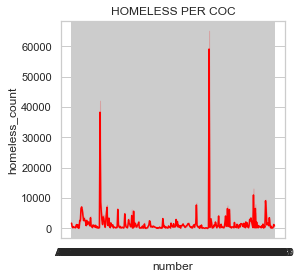

In [14]:
fig = plt.figure(figsize=(4,4))
sns.set(style="whitegrid")
sns.lineplot(x = df['number'], y = df['homeless_count'], color ='red' ).set_title('HOMELESS PER COC')

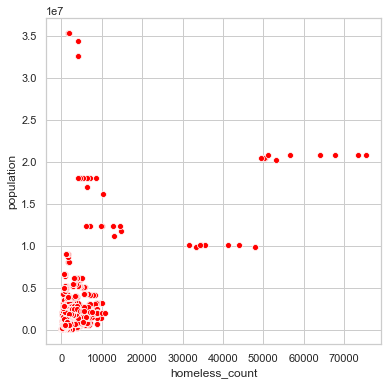

In [15]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(x= df['homeless_count'], y= df['population'], color='red')

In [16]:
df[df.homeless_count >= 30000].number.unique() #determine outliers and remove

array(['CA-600', 'NY-600'], dtype=object)

In [17]:
df[df.population >= 10000000].number.unique()

array(['CA-600', 'CA-603', 'NY-600', 'TX-607', 'TX-700'], dtype=object)

In [18]:
df = df[df.number != 'NY-600'] #dropping NYC
df = df[df.number != 'CA-600'] #dropping LA
df = df[df.number != 'CA-603'] #dropping Santa Barbara
df = df[df.number != 'TX-607'] #dropping Texas balance of state
df = df[df.number != 'TX-700'] #dropping Houston area

In [19]:
cols = list(df.columns) #check for NaN's
for col in cols:
    print(df[col].isna().value_counts())

False    3111
Name: state, dtype: int64
False    3111
Name: number, dtype: int64
False    3111
Name: year, dtype: int64
False    3111
Name: population, dtype: int64
False    3111
Name: renter_occupied_households, dtype: int64
False    3111
Name: eviction_filings, dtype: int64
False    3111
Name: evictions, dtype: int64
False    3111
Name: total_ssi, dtype: int64
False    3111
Name: aged_ssi, dtype: int64
False    3111
Name: disbl_ssi, dtype: int64
False    3111
Name: 18_und_ssi, dtype: int64
False    3111
Name: 18_64_ssi, dtype: int64
False    3111
Name: 65_ovr_ssi, dtype: int64
False    3111
Name: poverty_rate, dtype: int64
False    3111
Name: median_gross_rent, dtype: int64
False    3111
Name: median_household_income, dtype: int64
False    3111
Name: median_property_value, dtype: int64
False    3111
Name: avg_rent_burden, dtype: int64
False    2613
True      498
Name: eviction_rate, dtype: int64
False    2670
True      441
Name: eviction_filing_rate, dtype: int64
False    3111
Name: 

In [20]:
print(df.eviction_rate.isna().value_counts())
print('AVERAGE: ',df.eviction_rate.mean())

False    2613
True      498
Name: eviction_rate, dtype: int64
AVERAGE:  2.5188828055676504


In [21]:
df.eviction_rate = df.eviction_rate.fillna(2.52) #fill in missing data for eviction rate with mean

In [22]:
print(df.eviction_filing_rate.isna().value_counts())
print('AVERAGE: ', df.eviction_filing_rate.mean())

False    2670
True      441
Name: eviction_filing_rate, dtype: int64
AVERAGE:  5.8716986793553945


In [23]:
df.eviction_filing_rate = df.eviction_filing_rate.fillna(5.87) 

In [24]:
whole_numbers = ['year', 'population', 'renter_occupied_households',
       'eviction_filings', 'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi',
       '18_und_ssi', '18_64_ssi', '65_ovr_ssi','homeless_count']

In [25]:
for num in whole_numbers:
    df[num]= df[num].astype(int)
    

In [26]:
floating_nums= ['poverty_rate','pct_renter_occupied', 'median_gross_rent',
                'median_household_income','median_property_value', 'avg_rent_burden', 
                'pct_white', 'pct_af_am','pct_hispanic', 'pct_am_ind', 'pct_asian',
                'pct_nh_pi', 'pct_multiple','pct_other', 'eviction_rate',
                'eviction_filing_rate', 'unemploy_rate']

In [27]:
for flo in floating_nums:
    df[flo] = df[flo].astype(float).round(2)

In [28]:
def no_infinite(x):
    if x <= 0:
        x = 0.0000000001
    return x

In [29]:
zero_mins= ['eviction_filings', 'evictions','pct_nh_pi','pct_other', 'eviction_rate', 'eviction_filing_rate']

In [30]:
for item in zero_mins:
    df[item] = df[item].apply(lambda x: no_infinite(x))

In [31]:
df.eviction_filings = df.eviction_filings.astype(int)

In [32]:
df.evictions = df.evictions.astype(int)

In [33]:
df.shape

(3111, 31)

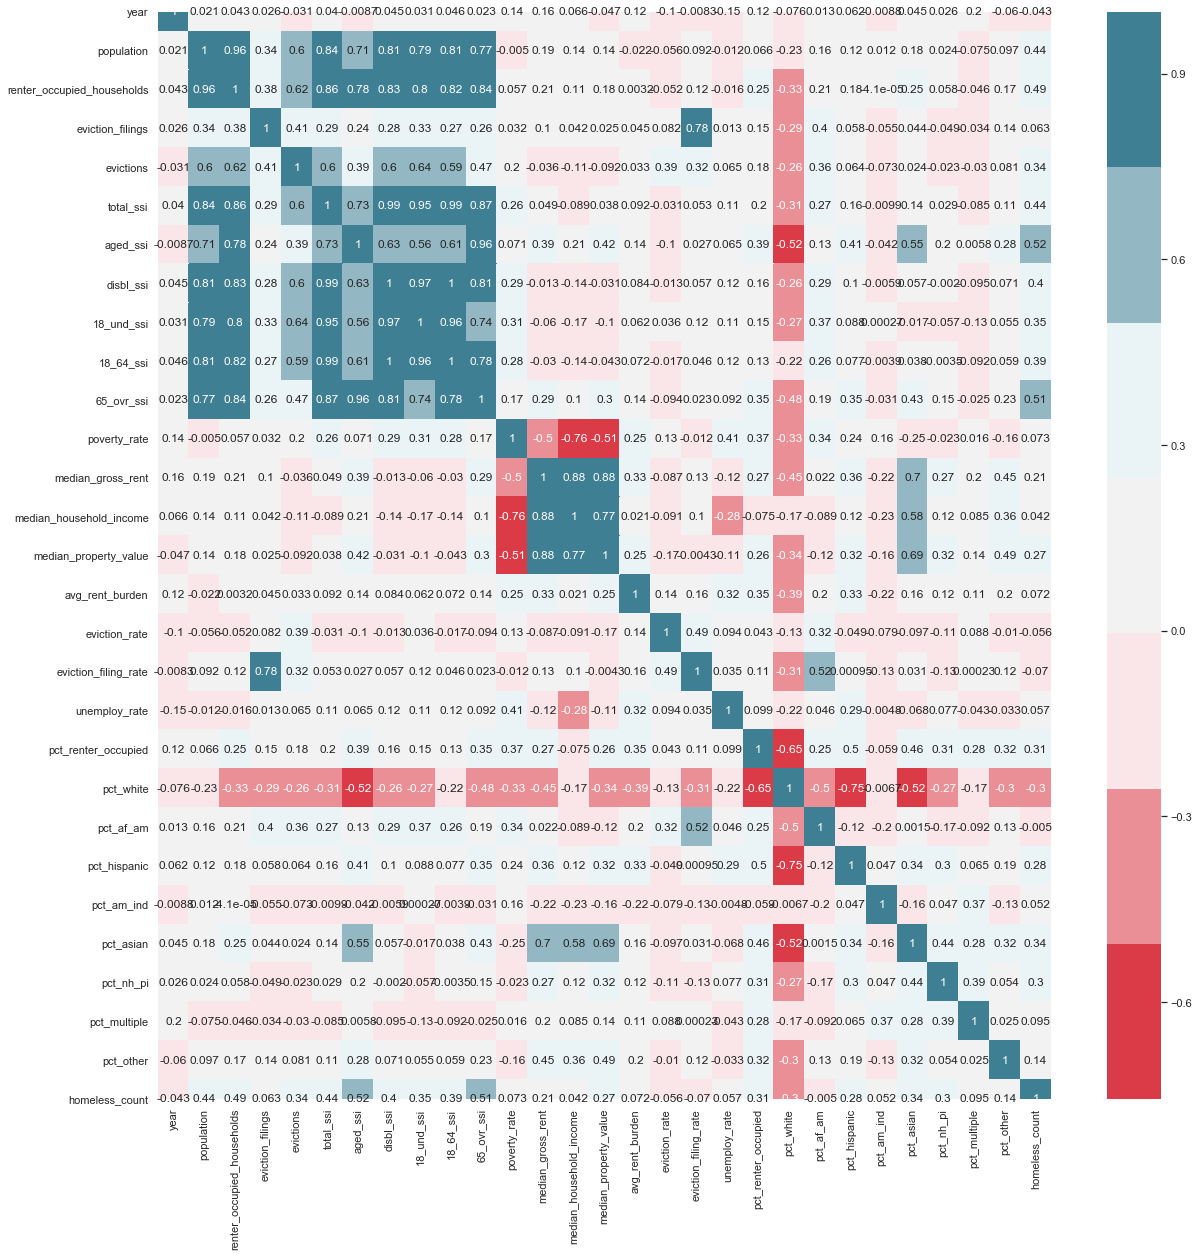

In [34]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))

ax = sns.heatmap(corr, annot = True,cmap = sns.diverging_palette(10, 220, sep=80, n=7))

In [35]:
sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
f, ax = plt.subplots(3,3,figsize = (20,16))
plt.rcParams["patch.force_edgecolor"] = True

vis1 = sns.distplot(df["homeless_count"],bins=20, color='red',hist_kws=dict(edgecolor="k", linewidth=2),ax= ax[0][0])
vis2 = sns.distplot(df["population"],bins=20, color ='red',hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[0][1])
vis3 = sns.distplot(df["poverty_rate"],bins=20, color='red',hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[0][2])
vis4 = sns.distplot(df["unemploy_rate"],bins=20,color='red',hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[1][0])
vis5 = sns.distplot(df["total_ssi"],bins=20,color='red', hist_kws=dict(edgecolor="k", linewidth=2),ax=ax[1][1])
vis6 = sns.distplot(df["disbl_ssi"],bins=20, color='red',hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[1][2])
vis7 = sns.distplot(df["median_gross_rent"],bins=20,color='red', hist_kws=dict(edgecolor="k", linewidth=2),ax=ax[2][0])
vis8 = sns.distplot(df["median_household_income"],bins=20,color='red', hist_kws=dict(edgecolor="k", linewidth=2),ax=ax[2][1])
vis9 = sns.distplot(df["eviction_rate"],bins=20,color='red', hist_kws=dict(edgecolor="k", linewidth=2),ax=ax[2][2]

SyntaxError: unexpected EOF while parsing (<ipython-input-35-7d230d999402>, line 13)

## Initial Linear Regression Model

In [34]:
target = df['homeless_count']
features = df.drop(['homeless_count','number','state','year'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state= 27,test_size=0.2)

In [35]:
regr = linear_model.LinearRegression()

In [36]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_train_pred = regr.predict(X_train)

In [38]:
y_test_pred = regr.predict(X_test)

In [39]:
print("R2: %.2f" % r2_score(y_train, y_train_pred))
print("R2: %.2f" % r2_score(y_test, y_test_pred))

R2: 0.44
R2: 0.41


## Feature Engineering

In [40]:
# Adding state mental health budget by CoC area

In [41]:
h_df = df[['state', 'number', 'year', 'population']] 

In [42]:
m_df = pd.read_csv('SMHA.csv')
m_df.head()

,Unnamed: 0,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Alabama,58.78,60.31,64.43,74.03,79.39,77.89,78.19,78.33,76.27,72.64
1,Alaska,287.56,269.64,278.63,293.16,277.03,289.71,310.01,380.33,335.36,341.08
2,Arizona,135.64,146.22,156.78,158.07,173.85,196.13,221.27,214.48,209.44,205.23
3,Arkansas,32.95,35.60,38.58,39.72,40.53,42.77,42.02,NaN,45.05,45.56
4,California,113.61,118.65,122.98,134.94,150.34,157.62,152.60,162.00,169.65,160.50


In [43]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
Unnamed: 0    51 non-null object
2004          51 non-null float64
2005          51 non-null float64
2006          51 non-null float64
2007          50 non-null float64
2008          51 non-null float64
2009          51 non-null float64
2010          50 non-null float64
2011          50 non-null float64
2012          51 non-null float64
2013          49 non-null float64
dtypes: float64(10), object(1)
memory usage: 4.5+ KB


In [44]:
m_df.rename({'Unnamed: 0': 'state'}, axis=1, inplace=True)

In [45]:
m_df[m_df.isnull().any(axis=1) == True] #fill missing data with averages for the state

,state,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
3,Arkansas,32.95,35.60,38.58,39.72,40.53,42.77,42.02,NaN,45.05,45.56
8,District of Columbia,409.92,404.40,394.10,392.27,381.90,388.83,NaN,307.45,305.37,306.87
9,Florida,35.96,36.56,38.17,39.87,42.11,40.90,39.55,39.04,37.28,NaN
11,Hawaii,147.99,156.67,135.75,NaN,207.58,212.15,169.99,126.63,131.16,131.77
31,New Mexico,27.78,24.23,25.58,97.61,95.98,93.51,93.37,138.20,131.44,NaN


In [46]:
m_df[m_df.isnull().any(axis=1) == True].mean(axis=1)

3      40.308889
8     365.678889
9      38.826667
11    157.743333
31     80.855556
dtype: float64

In [47]:
m_df.loc[3] = m_df.loc[3].fillna(40.31)
m_df.loc[8] = m_df.loc[8].fillna(365.68)
m_df.loc[9] = m_df.loc[9].fillna(38.83)
m_df.loc[11] = m_df.loc[11].fillna(157.74)
m_df.loc[31] = m_df.loc[31].fillna(80.86)

In [48]:
m_df.state = m_df.state.apply(lambda x: str(x).lower().strip())

In [49]:
m_df.head()

,state,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,alabama,58.78,60.31,64.43,74.03,79.39,77.89,78.19,78.33,76.27,72.64
1,alaska,287.56,269.64,278.63,293.16,277.03,289.71,310.01,380.33,335.36,341.08
2,arizona,135.64,146.22,156.78,158.07,173.85,196.13,221.27,214.48,209.44,205.23
3,arkansas,32.95,35.60,38.58,39.72,40.53,42.77,42.02,40.31,45.05,45.56
4,california,113.61,118.65,122.98,134.94,150.34,157.62,152.60,162.00,169.65,160.50


In [50]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
state    51 non-null object
2004     51 non-null float64
2005     51 non-null float64
2006     51 non-null float64
2007     51 non-null float64
2008     51 non-null float64
2009     51 non-null float64
2010     51 non-null float64
2011     51 non-null float64
2012     51 non-null float64
2013     51 non-null float64
dtypes: float64(10), object(1)
memory usage: 4.5+ KB


In [51]:
m_df['2011']=m_df['2011'].astype(float) #change data type
m_df['2013']=m_df['2013'].astype(float)

In [52]:
d= {}
for year in range(2007,2014):
    yearstr = str(year)
    
    df1 = m_df[['state', yearstr]]
    
    df1.rename({yearstr:'smha_per_capita'}, axis=1, inplace=True)
    
    df2 = h_df[h_df['year'] == year]
    
    df3 = pd.merge(df1, df2, how='inner', on='state')
    
    d[yearstr] = df3


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [53]:
smha = pd.concat(d, axis=0)

In [54]:
smha.head()

state  smha_per_capita  number  year  population
2007 0  alabama            74.03  AL-500  2007      845208
     1  alabama            74.03  AL-501  2007      577328
     2  alabama            74.03  AL-502  2007      203358
     3  alabama            74.03  AL-503  2007      786262
     4  alabama            74.03  AL-504  2007      224369

In [55]:
smha.reset_index(inplace=True)

In [56]:
smha.drop(['level_0','level_1'], axis=1, inplace=True)

In [57]:
smha.year = smha.year.apply(lambda x: int(x))

In [58]:
# adding averages to the missing yrs data 2014-2016
av_df = smha.groupby(['number','state']).mean()

av_df.head()

,,smha_per_capita,year,population
number,state,,,
AL-500,alabama,76.677143,2010.0,853834.714286
AL-501,alabama,76.677143,2010.0,593622.428571
AL-502,alabama,76.677143,2010.0,206756.714286
AL-503,alabama,76.677143,2010.0,816406.000000
AL-504,alabama,76.677143,2010.0,226697.714286


In [59]:
av_df.reset_index(inplace=True)

In [60]:
av_df.drop('year', axis=1, inplace=True)

In [61]:
dat = {}

for year in range(2014,2017):
    year_str = str(year)
    df_x = av_df.copy()
    df_x['year'] = year
    dat[year_str] = df_x
    
    
avg_data = pd.concat(dat, axis=0)

In [62]:
avg_data.head()

number    state  smha_per_capita     population  year
2014 0  AL-500  alabama        76.677143  853834.714286  2014
     1  AL-501  alabama        76.677143  593622.428571  2014
     2  AL-502  alabama        76.677143  206756.714286  2014
     3  AL-503  alabama        76.677143  816406.000000  2014
     4  AL-504  alabama        76.677143  226697.714286  2014

In [78]:
avg_data.year.unique()

array([2014, 2015, 2016])

In [63]:
smha = smha[['number','state', 'smha_per_capita', 'population', 'year']]

In [64]:
both = [smha, avg_data]

In [65]:
smha = pd.concat(both, axis=0)

In [66]:
smha.reset_index(inplace=True)

In [67]:
smha.drop('index', axis=1, inplace=True)

In [68]:
new_df = pd.merge(df, smha, how='inner', on=['year','number'])

In [69]:
new_df.head()

,state_x,number,year,population_x,renter_occupied_households,eviction_filings,evictions,total_ssi,aged_ssi,disbl_ssi,18_und_ssi,18_64_ssi,65_ovr_ssi,poverty_rate,median_gross_rent,median_household_income,median_property_value,avg_rent_burden,eviction_rate,eviction_filing_rate,unemploy_rate,pct_renter_occupied,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,homeless_count,state_y,smha_per_capita,population_y
0,alabama,AL-500,2007,845208,104742,3203,656,25480,1839,23641,5652,15899,3929,7.88,766.5,56126.0,160350.0,28.0,0.63,2.72,3.23,26.34,68.87,25.15,3.43,0.20,1.44,0.03,0.77,0.12,2104,alabama,74.03,845208.0
1,alabama,AL-500,2008,845208,105612,2172,976,25762,1722,24040,5659,16269,3834,7.88,766.5,56126.0,160350.0,28.0,0.80,1.87,4.56,26.34,68.87,25.15,3.43,0.20,1.44,0.03,0.77,0.12,2104,alabama,79.39,845208.0
2,alabama,AL-500,2009,845208,106482,1785,945,26244,1615,24629,5767,16724,3753,7.88,766.5,56126.0,160350.0,28.0,0.82,1.52,9.27,26.34,68.87,25.15,3.43,0.20,1.44,0.03,0.77,0.12,2273,alabama,77.89,845208.0
3,alabama,AL-500,2010,853551,107353,2486,1605,27098,1525,25573,5792,17596,3710,9.48,837.0,57397.0,169150.0,29.8,1.60,2.62,8.72,27.62,65.91,26.20,4.90,0.22,1.64,0.02,0.99,0.10,2273,alabama,78.19,853551.0
4,alabama,AL-500,2011,862556,108846,3708,2257,27532,1459,26073,5743,18117,3672,10.32,877.0,57898.5,168100.0,29.6,1.68,2.72,7.77,28.96,64.90,26.95,4.82,0.23,1.80,0.02,1.10,0.16,1950,alabama,78.33,862556.0


In [70]:
new_df.drop(['population_y', 'state_y'], axis=1, inplace=True)

In [71]:
new_df.rename({'state_x':'state', 'population_x':'population'}, axis=1, inplace=True)

In [72]:
new_df.year.unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [73]:
new_df.shape

(3203, 32)

In [74]:
new_df['mental_health_budget'] = new_df['smha_per_capita'] * new_df['population']

In [75]:
new_df['mental_health_budget'] = new_df['mental_health_budget'].apply(lambda x: round(x))

In [76]:
new_df.drop('smha_per_capita', axis=1, inplace=True)

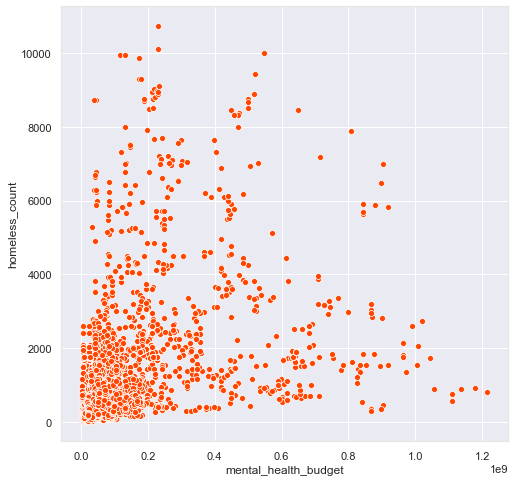

In [77]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=new_df['mental_health_budget'], y=new_df['homeless_count'], color='orangered' )

In [195]:
#new_df.to_csv('feat_data.csv')